In [1]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
n = 1000
beta01, beta11 = 5,-3
beta02, beta12 = 2, 4

#set up regression mixture
x1 = np.random.uniform(0, 10, size=400)
x2 = np.random.uniform(0, 10, size=600)

y1 = beta01 + beta11*x1 + np.random.normal(scale=5.0, size=400)
y2 = beta02 + beta12*x2 + np.random.normal(scale=4.0,size=600)

X = np.concatenate([x1, x2])
Y = np.concatenate([y1, y2])

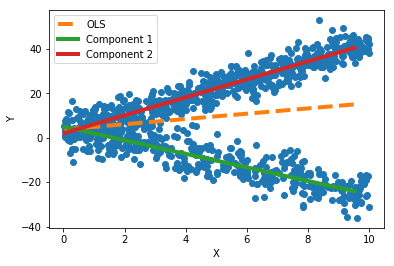

In [47]:
supp1 = np.arange(X.min(),X.max(),.5)
supp = sm.add_constant(supp1)

ols_model = sm.OLS(Y,sm.add_constant(X)).fit()
beta_ols = np.tile(ols_model.params,len(supp)).reshape(len(supp),2)
y_ols = (supp*beta_ols).sum(axis=1)

model2 = sm.OLS(y1,sm.add_constant(x1)).fit()
beta2 = np.tile(model2.params,len(supp)).reshape(len(supp),2)
yhat2 = (supp*beta2).sum(axis=1)

model3 = sm.OLS(y2,sm.add_constant(x2)).fit()
beta3 = np.tile(model3.params,len(supp)).reshape(len(supp),2)
yhat3 = (supp*beta3).sum(axis=1)

plt.plot(X,Y,'o')
plt.plot(supp1,y_ols, label='OLS',linestyle='dashed',linewidth=4)
plt.plot(supp1,yhat2, label='Component 1',linewidth=4)
plt.plot(supp1,yhat3,  label='Component 2',linewidth=4)


plt.plot()
plt.legend()
plt.ylabel('Y')
plt.xlabel('X')
plt.savefig('results/identif.png')

plt.show()